## Heart Disease prediction Model 

* use pandas to perform one hot encoding of a dataset
* Use scikit-learn to impliment a Decision Tree, Random Forest, and XGBoost model

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                                           
from xgboost import XGBClassifier
RANDOM_STATE = 55  # we will pass it to every sklearn call so we ensure repoducibiliy

#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.
- Let's train a machine learning model to assist with diagnosing this disease.

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

Let's Now load the dataset
* Sex
* ChestPainType
* RestingECG
* ExerciseAngina
* ST_Slope

In [2]:
# Load the dataset Using Pandas
df = pd.read_csv('heart.csv')  

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
for i, x in enumerate(df):
    print(i,x)

0 Age
1 Sex
2 ChestPainType
3 RestingBP
4 Cholesterol
5 FastingBS
6 RestingECG
7 MaxHR
8 ExerciseAngina
9 Oldpeak
10 ST_Slope
11 HeartDisease


We must perform some data engineering before working the models. There are 5 categorial features, so We will use Pandas to one hot encoding them

# One Hot encoding using Pandas 
* First we will remove the binary variable. Because one hot encoding them would do nothing to them. To achieve.To achieve this we will just count how many diffrent values there are in each categorical variable and consider only the variable with 3 or more value

In [5]:
cat_variable = ['Sex'
                ,'ChestPainType',
                'RestingECG',
                'ExerciseAngina',
                'ST_Slope'
                ]

In [6]:
# This will replace the columns with the one hot encoded once and keep the columns outside 'columns' agrument as it is
df = pd.get_dummies(data = df,prefix=cat_variable, columns= cat_variable) 

In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


Let's Choose the variable that will be the input features of the model 

* The target is HeartDisease
* All Other variable are Features that can potentially be use to pridict the target HeartDisease

In [8]:
features = [x for x in df.columns if x not in 'HeartDisease']  # Removing Our target variable

In [9]:
print(len(features))

20


## Spliting the dataset
* We will split our dataset into train and test dataset. we will use the function **Tran test split** from scikit-learn

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['HeartDisease'], train_size= 0.8, random_state=RANDOM_STATE)

In [11]:
print(f'train sample : {len(X_train)}')
print(f'test sample : {len(y_test)}')
print(f'targer proportion : {sum(y_train)/len(y_train):.4f}')  ## Calculate the percentage of positive case in the training dataset

train sample : 734
test sample : 184
targer proportion : 0.5518


## Building the models
* Using Decision Tree 

The hyperparameters we will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [12]:
min_ssl = [2,10,20,50,100,200,300,700] ## if the number is an integer, Then it is the actual quantity of sample
max_dl = [1,2,3,4,8,16,32,64, None] #  None mean that there have no depth limit 

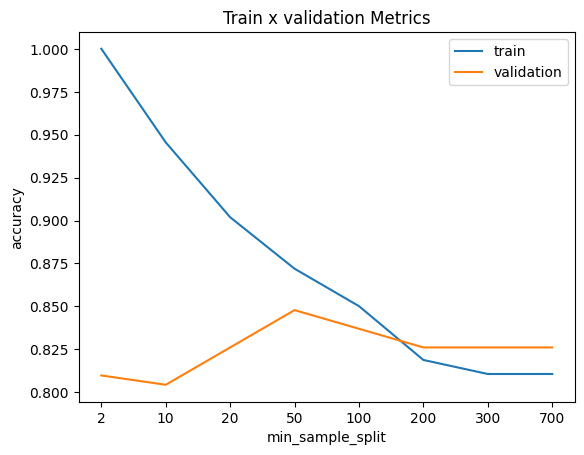

In [13]:
acc_lt = []
acc_lv = []
for min_ss in min_ssl:
    # We can fit the model at the same time we define it. because the fit functions return the fitted estimator
    model = DecisionTreeClassifier(min_samples_split= min_ss, random_state=RANDOM_STATE).fit(X_train,y_train)
    pred_train = model.predict(X_train) ## The pridicted value for the train dataset
    pred_val = model.predict(X_test) ## The pridicted the value for the test dataset
    accu_train = accuracy_score(pred_train,y_train)
    accu_val= accuracy_score(pred_val,y_test)
    acc_lt.append(accu_train)
    acc_lv.append(accu_val)
## Ploting the Grapgh 
plt.title('Train x validation Metrics')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_ssl)),labels=min_ssl)
plt.plot(acc_lt)
plt.plot(acc_lv)
plt.legend(['train','validation'])

* Now how to increasing the number of **min sample split** decreasing the overfit
* Do same experiment with max_depth

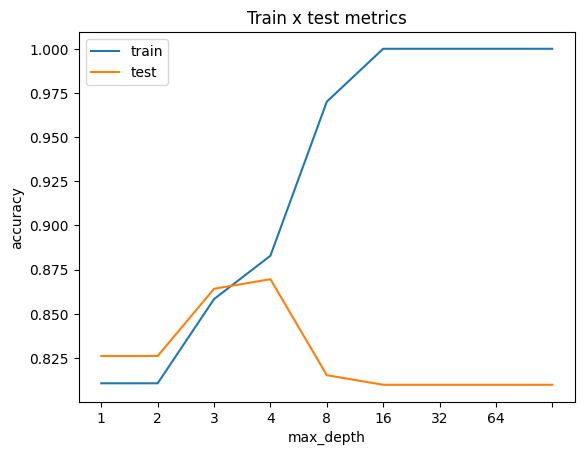

In [14]:
acc_list_train = []
acc_list_test = []
for max in max_dl:
    # we can fit the model at the same time we define it. because the function returns the fitted estimator
    model = DecisionTreeClassifier(max_depth=max, random_state=RANDOM_STATE).fit(X_train,y_train)
    pred_train = model.predict(X_train)  ## the predict value for the train dataset
    pred_test = model.predict(X_test) ## the predict value for the test dataset
    acc_train = accuracy_score(pred_train,y_train)
    acc_test = accuracy_score(pred_test, y_test)
    acc_list_train.append(acc_train)
    acc_list_test.append(acc_test)

plt.title('Train x test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_dl)),labels=max_dl)
plt.plot(acc_list_train)
plt.plot(acc_list_test)
plt.legend(['train','test'])
    

The test accuracy reaches the highest at tree_depth=3. When the allowed depth is smaller, the tree cannot make enough splits to distinguish positives from negatives (having the underfit problem), but when the allowed depth is too high ( >= 5), the tree becomes too specialized to the training set and thus losing accuracy to the test dataset (having the overfit problem). Our final tree model then will have:

- `max_depth = 3`
- `min_samples_split = 50`

In [15]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50,max_depth=3, random_state=RANDOM_STATE).fit(X_train,y_train)


In [16]:
data = print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics test:
	Accuracy score: 0.8641


## Random Forest
Now let's try the random forest algorithm also using the scikit learn implimentation, Naturally, all of the above hyperparameters will exist in this algorithm, since it is just an ensemble of Decision Trees, But will have another hyprtparameters that you will use called `n_estimators` which is how many diffrent decision trees will be fitted.
- Run the same script again, but with another parameter, `n_estimators` where we will choose between 10,50 and 100. the default is 100.


In [17]:
min_sample_sl = [2,10,30,50,100,200,300,700] ## if the number is an integer, Then it is the acutal quantity of sample.
                                             ## if it is a float, then it is the percentage of the datase
max_depth_l = [2,4,8,16,32,64, None]
n_estimator_l = [10,50,100,500]


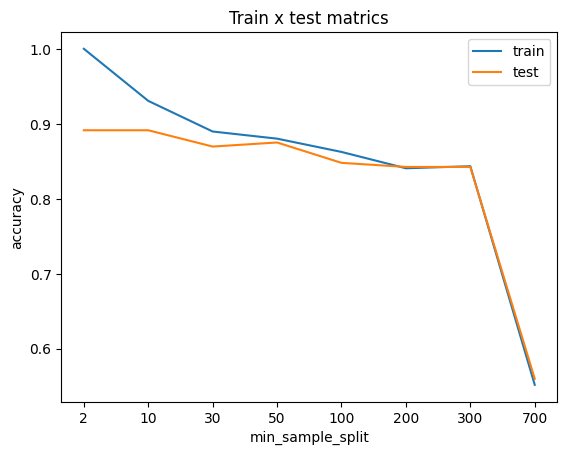

In [18]:
## Min Sample Split
acc_l_train = []
acc_l_test = []
for mss in min_sample_sl:
    # we can fit the model at the same time you define it, because the fit function returns the fitted estimators
    model = RandomForestClassifier(min_samples_split=mss, random_state=RANDOM_STATE).fit(X_train,y_train)
    predt_train = model.predict(X_train)  ## The predicted values for the train datasets
    predt_test = model.predict(X_test)  ## The predicted value for the test datasets
    accur_train = accuracy_score(predt_train, y_train)
    accur_test = accuracy_score(predt_test,y_test)
    acc_l_train.append(accur_train)
    acc_l_test.append(accur_test)

## Ploting the data
plt.title('Train x test matrics')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_sample_sl)),labels=min_sample_sl)
plt.plot(acc_l_train)
plt.plot(acc_l_test)
plt.legend(['train','test'])

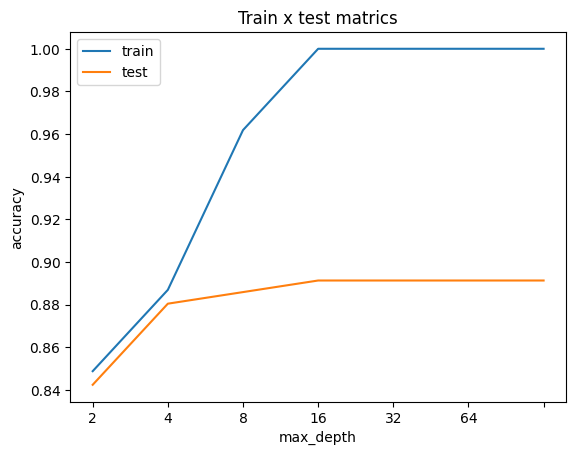

In [19]:
## Max Depth 
ac_l_train = []
ac_l_test = []
for max_Depth in max_depth_l:
    model = RandomForestClassifier(max_depth=max_Depth, random_state= RANDOM_STATE).fit(X_train, y_train)
    pre_train = model.predict(X_train) ## The prediction value for the train dataset
    pre_test = model.predict(X_test)  ## The prediction value for the test dataset
    ac_train = accuracy_score(pre_train,y_train)
    ac_test =  accuracy_score(pre_test,y_test)
    ac_l_train.append(ac_train)
    ac_l_test.append(ac_test)
## Ploting the data

plt.title('Train x test matrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_l)),labels=max_depth_l)
plt.plot(ac_l_train)
plt.plot(ac_l_test)
plt.legend(['train','test'])


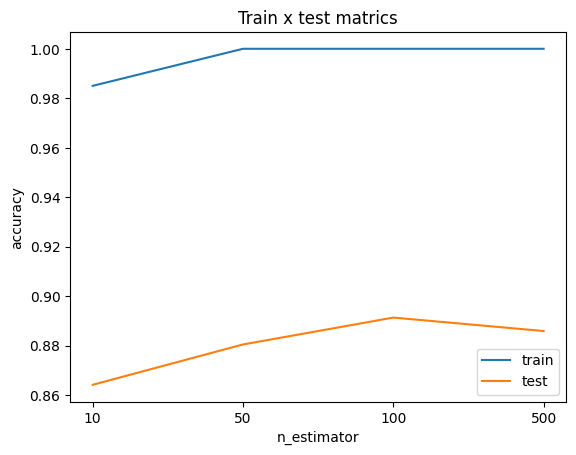

In [20]:
acury_li_train = []
acury_li_test = []
for n_estimator in n_estimator_l:
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=RANDOM_STATE).fit(X_train,y_train)
    prediction_train = model.predict(X_train) ## The predicted value for the train dataset
    prediction_test = model.predict(X_test)   ## The predicted value for the test dataset
    accuracy_train = accuracy_score(prediction_train,y_train)
    accuracy_test = accuracy_score(prediction_test,y_test)
    acury_li_train.append(accuracy_train)
    acury_li_test.append(accuracy_test)

## Ploting the dataset
plt.title('Train x test matrics')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimator_l)),labels=n_estimator_l)
plt.plot(acury_li_train)
plt.plot(acury_li_test)
plt.legend(['train','test'])

Let's then fit a random forest with the following parameters:
* max_depth : 8
* Min_sample_split : 10
* n_estimators : 100

In [21]:
random_forest_model = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=10).fit(X_train,y_train)

In [22]:
print(f'Matrics train: \n\t Accuracy score : {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}')
print(f'\n Metrics test \n\t Accuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}')

Matrics train: 
	 Accuracy score : 0.9251

 Metrics test 
	 Accuracy score: 0.8859


## XGBoost
* Now, the last model we will test is the gradient boosting model. Called XGBoost



In [42]:
# Let's define the subset of our training set(should not use the test set here)
n = int(len(X_train)*0.8) ## let's use 80% train and 20% to eval(test)



In [43]:
X_train_fit,X_train_eval, y_train_fit, y_train_eval = X_train[:n],X_train[n:],y_train[:n],y_train[n:]

In [44]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = RANDOM_STATE ,early_stopping_rounds = 50)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])
# Here we must pass a list to the eval_set, because you can have several diffrent tuples ov eval sets.The parameter
# early_shopping_round is the number of iterations that it will wait to check if the cost function decrease or not
# if not. it will stop to get the iteration that returned tje lowest matric on the eval set.

[0]	validation_0-logloss:0.63301
[1]	validation_0-logloss:0.59553
[2]	validation_0-logloss:0.56612
[3]	validation_0-logloss:0.54186
[4]	validation_0-logloss:0.52348
[5]	validation_0-logloss:0.50610
[6]	validation_0-logloss:0.49371
[7]	validation_0-logloss:0.48365
[8]	validation_0-logloss:0.47321
[9]	validation_0-logloss:0.46537
[10]	validation_0-logloss:0.45999
[11]	validation_0-logloss:0.45620
[12]	validation_0-logloss:0.45482
[13]	validation_0-logloss:0.44974
[14]	validation_0-logloss:0.44494
[15]	validation_0-logloss:0.44072
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43935
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44321
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435
[28]	validation_0-logloss:0.45316
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
xgb_model.best_iteration

17

In [46]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")


Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533
